# **Pre-processing Data**

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('/content/train.csv')

df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [44]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [45]:
# buang fitur dengan nilai unik
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

In [46]:
# ubah sex ke fitur numerik
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    0  22.0      1      0   7.2500   NaN        S
1           1       1    1  38.0      1      0  71.2833   C85        C
2           1       3    1  26.0      0      0   7.9250   NaN        S
3           1       1    1  35.0      1      0  53.1000  C123        S
4           0       3    0  35.0      0      0   8.0500   NaN        S
..        ...     ...  ...   ...    ...    ...      ...   ...      ...
886         0       2    0  27.0      0      0  13.0000   NaN        S
887         1       1    1  19.0      0      0  30.0000   B42        S
888         0       3    1   NaN      1      2  23.4500   NaN        S
889         1       1    0  26.0      0      0  30.0000  C148        C
890         0       3    0  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

In [47]:
# isi embarked dengan nilai modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    0  22.0      1      0   7.2500   NaN        S
1           1       1    1  38.0      1      0  71.2833   C85        C
2           1       3    1  26.0      0      0   7.9250   NaN        S
3           1       1    1  35.0      1      0  53.1000  C123        S
4           0       3    0  35.0      0      0   8.0500   NaN        S
..        ...     ...  ...   ...    ...    ...      ...   ...      ...
886         0       2    0  27.0      0      0  13.0000   NaN        S
887         1       1    1  19.0      0      0  30.0000   B42        S
888         0       3    1   NaN      1      2  23.4500   NaN        S
889         1       1    0  26.0      0      0  30.0000  C148        C
890         0       3    0  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

In [48]:
# encode fitur embarked
df['Embarked'] = df['Embarked'].apply(lambda x: 1 if x == 'S' else 2 if x == 'C' else 3)

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0           0       3    0  22.0      1      0   7.2500   NaN         1
1           1       1    1  38.0      1      0  71.2833   C85         2
2           1       3    1  26.0      0      0   7.9250   NaN         1
3           1       1    1  35.0      1      0  53.1000  C123         1
4           0       3    0  35.0      0      0   8.0500   NaN         1
..        ...     ...  ...   ...    ...    ...      ...   ...       ...
886         0       2    0  27.0      0      0  13.0000   NaN         1
887         1       1    1  19.0      0      0  30.0000   B42         1
888         0       3    1   NaN      1      2  23.4500   NaN         1
889         1       1    0  26.0      0      0  30.0000  C148         2
890         0       3    0  32.0      0      0   7.7500   NaN         3

[891 rows x 9 columns]

In [49]:
# isi age dengan nilai median
df['Age'] = df['Age'].fillna(df['Age'].median())

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0           0       3    0  22.0      1      0   7.2500   NaN         1
1           1       1    1  38.0      1      0  71.2833   C85         2
2           1       3    1  26.0      0      0   7.9250   NaN         1
3           1       1    1  35.0      1      0  53.1000  C123         1
4           0       3    0  35.0      0      0   8.0500   NaN         1
..        ...     ...  ...   ...    ...    ...      ...   ...       ...
886         0       2    0  27.0      0      0  13.0000   NaN         1
887         1       1    1  19.0      0      0  30.0000   B42         1
888         0       3    1  28.0      1      2  23.4500   NaN         1
889         1       1    0  26.0      0      0  30.0000  C148         2
890         0       3    0  32.0      0      0   7.7500   NaN         3

[891 rows x 9 columns]

In [50]:
# ubah cabin menjadi indikator biner
df['Cabin'] = df['Cabin'].notna().astype(int)

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3    0  22.0      1      0   7.2500      0         1
1           1       1    1  38.0      1      0  71.2833      1         2
2           1       3    1  26.0      0      0   7.9250      0         1
3           1       1    1  35.0      1      0  53.1000      1         1
4           0       3    0  35.0      0      0   8.0500      0         1
..        ...     ...  ...   ...    ...    ...      ...    ...       ...
886         0       2    0  27.0      0      0  13.0000      0         1
887         1       1    1  19.0      0      0  30.0000      1         1
888         0       3    1  28.0      1      2  23.4500      0         1
889         1       1    0  26.0      0      0  30.0000      1         2
890         0       3    0  32.0      0      0   7.7500      0         3

[891 rows x 9 columns]

In [51]:
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


# **Implementasi Logistic Regression, kNN, dan SVM**

In [60]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.copy()
X = X.drop(columns=['Survived'])
y = df['Survived']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()

logreg.fit(XTrain, yTrain)

yPred = logreg.predict(XTest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.neighbors import KNeighborsClassifier

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XTrain, yTrain)
yPred_knn = knn.predict(XTest)

In [62]:
from sklearn.svm import SVC

# SVM
svm = SVC()
svm.fit(XTrain, yTrain)
yPred_svm = svm.predict(XTest)

Logistic Regression:
Accuracy: 0.8324022346368715
Precision: 0.7746478873239436
Recall: 0.7971014492753623
F1-score: 0.7857142857142857


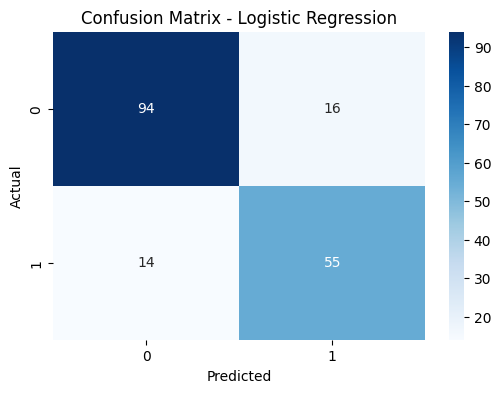


kNN:
Accuracy: 0.7262569832402235
Precision: 0.6785714285714286
Recall: 0.5507246376811594
F1-score: 0.608


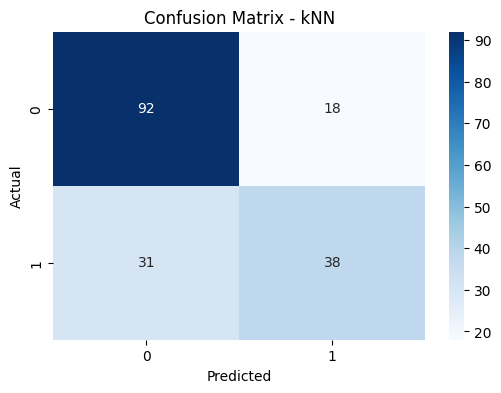


SVM:
Accuracy: 0.7206703910614525
Precision: 0.8064516129032258
Recall: 0.36231884057971014
F1-score: 0.5


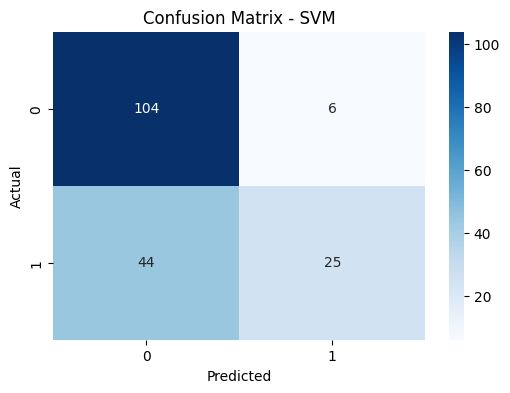

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Precision:", precision_score(yTest, yPred))
print("Recall:", recall_score(yTest, yPred))
print("F1-score:", f1_score(yTest, yPred))

cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate kNN
print("\nkNN:")
print("Accuracy:", accuracy_score(yTest, yPred_knn))
print("Precision:", precision_score(yTest, yPred_knn))
print("Recall:", recall_score(yTest, yPred_knn))
print("F1-score:", f1_score(yTest, yPred_knn))

cm_knn = confusion_matrix(yTest, yPred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate SVM
print("\nSVM:")
print("Accuracy:", accuracy_score(yTest, yPred_svm))
print("Precision:", precision_score(yTest, yPred_svm))
print("Recall:", recall_score(yTest, yPred_svm))
print("F1-score:", f1_score(yTest, yPred_svm))

cm_svm = confusion_matrix(yTest, yPred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()